# Baktash Ansari
# 99521082
### I made a shortcut from dataset in my Drive

In [1]:
from google.colab import drive
drive.mount('/content/drive')

Mounted at /content/drive


## **Import libraries**

In [71]:
import tensorflow as tf
from tensorflow import keras
import matplotlib.pyplot as plt
from tensorflow.keras.models import Sequential, Model
from tensorflow.keras.layers import Dense, Conv2D, MaxPool2D, Activation, Input, Flatten, Rescaling, Dropout
from tensorflow.keras.optimizers import Adam
from tensorflow.keras.callbacks import EarlyStopping

## **Download the dataset**

Download and extract the dataset from the below link in a folder.

https://drive.google.com/file/d/1SCpVEdJ6_YOAcy2iW05ENlMh-OCcFz3P/view?usp=sharing

In [4]:
! mkdir /content/dataset
%cd /content/dataset/
! unzip /content/drive/MyDrive/hw3_deep/dataset.zip

/content/dataset
Archive:  /content/drive/MyDrive/hw3_deep/dataset.zip
   creating: no/
  inflating: no/no0.jpg              
  inflating: no/no1.jpg              
  inflating: no/no10.jpg             
  inflating: no/no100.jpg            
  inflating: no/no1000.jpg           
  inflating: no/no1001.jpg           
  inflating: no/no1002.jpg           
  inflating: no/no1003.jpg           
  inflating: no/no1004.jpg           
  inflating: no/no1005.jpg           
  inflating: no/no1006.jpg           
  inflating: no/no1007.jpg           
  inflating: no/no1008.jpg           
  inflating: no/no1009.jpg           
  inflating: no/no101.jpg            
  inflating: no/no1010.jpg           
  inflating: no/no1011.jpg           
  inflating: no/no1012.jpg           
  inflating: no/no1013.jpg           
  inflating: no/no1014.jpg           
  inflating: no/no1015.jpg           
  inflating: no/no1016.jpg           
  inflating: no/no1017.jpg           
  inflating: no/no1018.jpg           


## **Read image files from directory**

To be familiar with keras dataset loading and preprocessing you can use the below link:

https://keras.io/api/preprocessing/image/

Please set ***validation_split = 0.2***

In [50]:
train, val = ehem = keras.utils.image_dataset_from_directory(
    "/content/dataset",
    labels="inferred",
    label_mode="int",
    class_names=None,
    color_mode="grayscale",
    batch_size=32,
    image_size=(256, 256),
    shuffle=True,
    seed=80,
    validation_split = 0.2,
    subset="both",
    interpolation="bilinear",
    follow_links=False,
    crop_to_aspect_ratio=False,
)

Found 3000 files belonging to 2 classes.
Using 2400 files for training.
Using 600 files for validation.


## **Display the dataset**

Plot some samples from the dataset to see and know what are you working with.

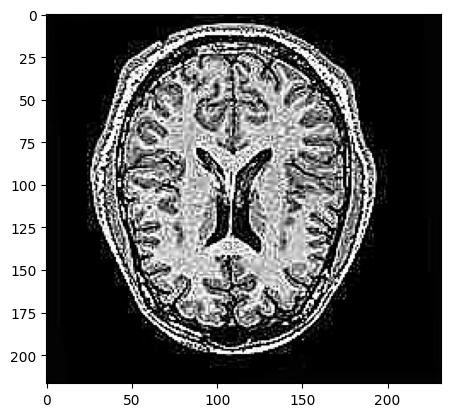

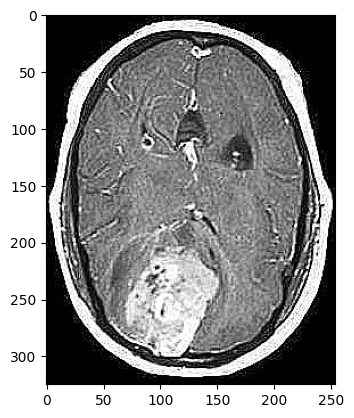

In [30]:
def show_image(path):
  img = plt.imread(path)
  imgplot = plt.imshow(img)
  plt.show()

# from No label:
show_image("/content/dataset/no/no100.jpg")

# from Yes label:
show_image("/content/dataset/yes/y1003.jpg")

## **Build the models**

In this section you will build the model with two approaches.
First you should build it with the Sequential API and then you have to work with the Functional API in the second part.

You can use the below link to know more about these two APIs.

Keep the architecture as simple as possible.

https://medium.com/analytics-vidhya/keras-model-sequential-api-vs-functional-api-fc1439a6fb10

## **1.Sequential API**

### **Build a model**

In [93]:
seq_model = Sequential()
seq_model.add(Input(shape = (256,256, 1)))
seq_model.add(Rescaling(1./255))
seq_model.add(Conv2D(filters = 16, kernel_size = (5, 5), activation = 'relu'))
seq_model.add(MaxPool2D())
seq_model.add(Dropout(0.5))
seq_model.add(Conv2D(filters = 32, kernel_size = (5, 5), activation = 'relu'))
seq_model.add(MaxPool2D())
seq_model.add(Dropout(0.4))
seq_model.add(Conv2D(filters = 64, kernel_size = (3, 3), activation = 'relu'))
seq_model.add(MaxPool2D())
seq_model.add(Dropout(0.3))
seq_model.add(Conv2D(filters = 128, kernel_size = (3, 3), activation = 'relu'))
seq_model.add(MaxPool2D())
seq_model.add(Dropout(0.2))
seq_model.add(Flatten())
seq_model.add(Dense(64, activation = "relu"))
seq_model.add(Dropout(0.2))
seq_model.add(Dense(32, activation = "relu"))
seq_model.add(Dense(1, activation = "sigmoid"))
seq_model.summary()

Model: "sequential_25"
_________________________________________________________________
 Layer (type)                Output Shape              Param #   
 rescaling_16 (Rescaling)    (None, 256, 256, 1)       0         
                                                                 
 conv2d_59 (Conv2D)          (None, 252, 252, 16)      416       
                                                                 
 max_pooling2d_52 (MaxPooli  (None, 126, 126, 16)      0         
 ng2D)                                                           
                                                                 
 dropout_18 (Dropout)        (None, 126, 126, 16)      0         
                                                                 
 conv2d_60 (Conv2D)          (None, 122, 122, 32)      12832     
                                                                 
 max_pooling2d_53 (MaxPooli  (None, 61, 61, 32)        0         
 ng2D)                                               

In [94]:
seq_model.compile(optimizer='adam', loss='binary_crossentropy',  metrics=['accuracy'])

### **Train the model**

In [95]:
history = seq_model.fit(train, validation_data=val, epochs=20)

Epoch 1/20
75/75 [==============================] - 7s 66ms/step - loss: 0.5818 - accuracy: 0.6746 - val_loss: 0.5418 - val_accuracy: 0.7500
Epoch 2/20
75/75 [==============================] - 7s 89ms/step - loss: 0.3989 - accuracy: 0.8142 - val_loss: 0.4322 - val_accuracy: 0.7700
Epoch 3/20
75/75 [==============================] - 5s 63ms/step - loss: 0.3325 - accuracy: 0.8537 - val_loss: 0.3022 - val_accuracy: 0.8867
Epoch 4/20
75/75 [==============================] - 6s 79ms/step - loss: 0.2407 - accuracy: 0.8971 - val_loss: 0.2073 - val_accuracy: 0.9217
Epoch 5/20
75/75 [==============================] - 6s 71ms/step - loss: 0.1778 - accuracy: 0.9304 - val_loss: 0.1954 - val_accuracy: 0.9283
Epoch 6/20
75/75 [==============================] - 6s 84ms/step - loss: 0.1234 - accuracy: 0.9571 - val_loss: 0.1295 - val_accuracy: 0.9650
Epoch 7/20
75/75 [==============================] - 5s 65ms/step - loss: 0.1134 - accuracy: 0.9571 - val_loss: 0.1162 - val_accuracy: 0.9617
Epoch 8/20
75

### **Test the model**

In [96]:
accuracy = seq_model.evaluate(val)[1]
print(f'Validation Accuracy: {accuracy}')

19/19 [==============================] - 1s 32ms/step - loss: 0.1469 - accuracy: 0.9733
Validation Accuracy: 0.9733333587646484


### **Plot loss and accuracy**

In this part you should plot the loss and accuracy of train and test.

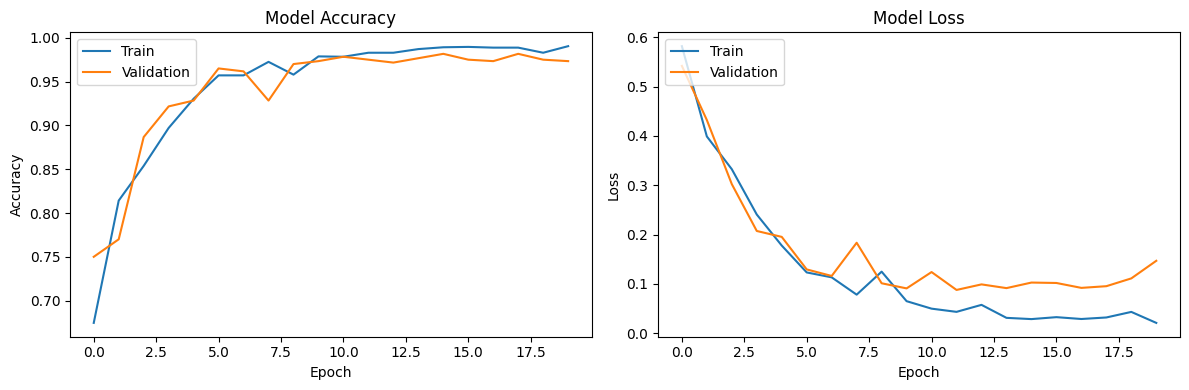

In [97]:
# Plot training history
plt.figure(figsize=(12, 4))

# Plot training & validation accuracy values
plt.subplot(1, 2, 1)
plt.plot(history.history['accuracy'])
plt.plot(history.history['val_accuracy'])
plt.title('Model Accuracy')
plt.xlabel('Epoch')
plt.ylabel('Accuracy')
plt.legend(['Train', 'Validation'], loc='upper left')

# Plot training & validation loss values
plt.subplot(1, 2, 2)
plt.plot(history.history['loss'])
plt.plot(history.history['val_loss'])
plt.title('Model Loss')
plt.xlabel('Epoch')
plt.ylabel('Loss')
plt.legend(['Train', 'Validation'], loc='upper left')

# Show plots
plt.tight_layout()
plt.show()

## **2.Functional API**

### **Build a model**

In [99]:

input_layer = Input(shape=(256, 256, 1))

rescaled = Rescaling(1./255)(input_layer)

# Convolutional layers
conv1 = Conv2D(16, kernel_size=(5, 5), activation='relu')(rescaled)
max1 = MaxPool2D()(conv1)
drop1 = Dropout(0.5)(max1)

conv2 = Conv2D(32, kernel_size=(5, 5), activation='relu')(drop1)
max2 = MaxPool2D()(conv2)
drop2 = Dropout(0.4)(max2)

conv3 = Conv2D(64, kernel_size=(3, 3), activation='relu')(drop2)
max3 = MaxPool2D()(conv3)
drop3 = Dropout(0.3)(max3)

conv4 = Conv2D(128, kernel_size=(3, 3), activation='relu')(drop3)
max4 = MaxPool2D()(conv4)
drop4 = Dropout(0.2)(max4)

# Flatten layer
flat = Flatten()(drop4)

# Dense layers
dense1 = Dense(64, activation='relu')(flat)
drop5 = Dropout(0.2)(dense1)

dense2 = Dense(32, activation='relu')(drop5)

# Output layer
output_layer = Dense(1, activation='sigmoid')(dense2)

# Create functional model
functional_model = Model(inputs=input_layer, outputs=output_layer)

# Display the model summary
functional_model.summary()

Model: "model_1"
_________________________________________________________________
 Layer (type)                Output Shape              Param #   
 input_28 (InputLayer)       [(None, 256, 256, 1)]     0         
                                                                 
 rescaling_18 (Rescaling)    (None, 256, 256, 1)       0         
                                                                 
 conv2d_67 (Conv2D)          (None, 252, 252, 16)      416       
                                                                 
 max_pooling2d_60 (MaxPooli  (None, 126, 126, 16)      0         
 ng2D)                                                           
                                                                 
 dropout_28 (Dropout)        (None, 126, 126, 16)      0         
                                                                 
 conv2d_68 (Conv2D)          (None, 122, 122, 32)      12832     
                                                           

In [100]:
functional_model.compile(optimizer='adam', loss='binary_crossentropy',  metrics=['accuracy'])

### **Train the model**

In [101]:
history = functional_model.fit(train, validation_data=val, epochs=20)

Epoch 1/20
75/75 [==============================] - 7s 71ms/step - loss: 0.6115 - accuracy: 0.6733 - val_loss: 0.5304 - val_accuracy: 0.7417
Epoch 2/20
75/75 [==============================] - 6s 79ms/step - loss: 0.4441 - accuracy: 0.7937 - val_loss: 0.4143 - val_accuracy: 0.8300
Epoch 3/20
75/75 [==============================] - 5s 61ms/step - loss: 0.3408 - accuracy: 0.8467 - val_loss: 0.2957 - val_accuracy: 0.8900
Epoch 4/20
75/75 [==============================] - 6s 71ms/step - loss: 0.2560 - accuracy: 0.8925 - val_loss: 0.2161 - val_accuracy: 0.9217
Epoch 5/20
75/75 [==============================] - 7s 82ms/step - loss: 0.2006 - accuracy: 0.9254 - val_loss: 0.1712 - val_accuracy: 0.9350
Epoch 6/20
75/75 [==============================] - 5s 62ms/step - loss: 0.1434 - accuracy: 0.9421 - val_loss: 0.1896 - val_accuracy: 0.9317
Epoch 7/20
75/75 [==============================] - 6s 72ms/step - loss: 0.1259 - accuracy: 0.9533 - val_loss: 0.1079 - val_accuracy: 0.9667
Epoch 8/20
75

### **Test the model**

In [104]:
accuracy = functional_model.evaluate(val)[1]
print(f'Validation Accuracy: {accuracy}')

19/19 [==============================] - 1s 53ms/step - loss: 0.1026 - accuracy: 0.9683
Validation Accuracy: 0.9683333039283752


### **Plot loss and accuracy**

In this part you should plot the loss and accuracy of train and test.

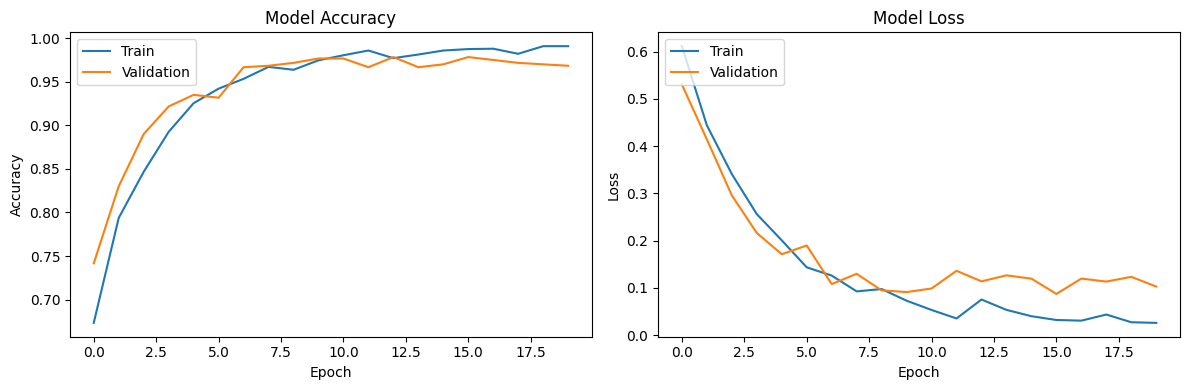

In [105]:
# Plot training history
plt.figure(figsize=(12, 4))

# Plot training & validation accuracy values
plt.subplot(1, 2, 1)
plt.plot(history.history['accuracy'])
plt.plot(history.history['val_accuracy'])
plt.title('Model Accuracy')
plt.xlabel('Epoch')
plt.ylabel('Accuracy')
plt.legend(['Train', 'Validation'], loc='upper left')

# Plot training & validation loss values
plt.subplot(1, 2, 2)
plt.plot(history.history['loss'])
plt.plot(history.history['val_loss'])
plt.title('Model Loss')
plt.xlabel('Epoch')
plt.ylabel('Loss')
plt.legend(['Train', 'Validation'], loc='upper left')

# Show plots
plt.tight_layout()
plt.show()